# Programmering

## Läs in data

In [ ]:
% mat filer
load 'namn på filen'

## Add paths

In [ ]:
% path to data
addpath('AF_RR_intervals/')
% path to source code
addpath('src/')

## For-loopar

In [ ]:
sum = 0;
for t = 1:1:8
    sum = sum + 1
end

### For-loop string arrays

In [ ]:
for data = {'afdb_1.mat','afdb_2.mat','afdb_3.mat','afdb_4.mat','afdb_5.mat','afdb_6.mat','afdb_7.mat'}
    funcs.plotdata(data{1});
end

Inside a class file:

In [ ]:
% Outside the class file
trainingdata = {'afdb_1.mat','afdb_2.mat','afdb_3.mat','afdb_4.mat','afdb_5.mat','afdb_6.mat','afdb_7.mat'}
func(trainingdata)

% inside class file
for i = 1:length(trainingdata)
    load(trainingdata{i})
end

## Most occuring element
Returns most occuring element, function 'mode(...)'

In [ ]:
label = mode(targetsRR(i:i+windowsize));

## If else

In [ ]:
if t > 0 & t < 10
    x = 10
elseif t > 100
    x = 100
end

## Ta bort värden i matris

In [ ]:
A(1:4,:) = []

## Funktioner
Exempel:

In [ ]:
function x = myfunc(input)
    x = 10;
end

### Importera funktioner från en annan .m fil
Skriv vilken fil + vilken funktion, exempel:
- main.m
- Allfuncs.m

Där Allfuncs.m har en function process:

In [ ]:
% Inside main.m

x = Allfuncs.process(...);

Om Allfuncs.m hade varit i en annan mapp:

### Skapa en class med flera funktioner
Lagra flera funktioner i samma script. Klassen måste ha samma namn som fil namnet, i detta exemplet måste filen heta inspect.m = classdef inspect

In [ ]:
classdef inspect
    methods(Static)
% Class start

        function data_inspection(data)
            figure,plot(targetsRR),title(string(data))
        end

% Class end
    end
end

In [ ]:
% inside main.m

inspect.data_inspection(...);

## Strings

### Append

In [ ]:
name = append('CSV',int2str(t),'.csv');

## Data processing

### Ta bort rader i matrix med NaN

In [ ]:
q = data(:,2); % y axeln i data
t = data(:,1)./10^6; % x axeln i data
dat = [t q];
dat(any(isnan(dat), 2), :) = [];
t = dat(:,1);
q = dat(:,2);

# Presentera data

## Plots

### Subplots

In [ ]:
% Ovanpå varandra

subplot(2,1,1);
x = linspace(0,10);
y1 = sin(x);
plot(x,y1)

subplot(2,1,2); 
y2 = sin(5*x);
plot(x,y2)

In [ ]:
% sidan om

subplot(1,2,1);
x = linspace(0,10);
y1 = sin(x);
plot(x,y1)

subplot(1,2,2); 
y2 = sin(5*x);
plot(x,y2)

### Title för subplots

In [ ]:
sgtitle('Magnetic Field Frequency Spectrum')

### Limits

In [ ]:
func = @(x) x.^2;
t = -10:0.1:10;
plot(t,func(t)), xlim([-5 5]), ylim([-5 5])

## Envelope

In [ ]:
%q är y axeln i data, t är x axeln i data

[up,lo] = envelope(q,20,'peak');
hold on
plot(t,q,t,up,'linewidth',1.5)
legend('Signal','Envelope'), title('Magnetic Field Frequency Spectrum')
hold off

## Semilogy (y log scale, linear x)

In [ ]:
ff = (0:Padd-1)'/Padd-0.5;
semilogy(ff, W) // W is y scale FFT

## fftshit (center data so f=0 is center in array)

In [ ]:
Padd = 1024*4; %100;                                     % Try increasing the zero-padding to 1024.
X = fftshift( abs( fft(x, Padd) ).^2 / N );

# Matte

## Anpassa funktion till data

In [ ]:
p = polyfit(x,y,n)

## Integraler

In [ ]:
syms u
int(u*exp(u),0,1)

## polyval
Estimates a multiplication of polynomials

In [ ]:
C  = [ 1 0.6 0 0 0.4 ];
X = abs( polyval(C,w) ).^2;
w  = exp( 1i* linspace(-.5,.5,Padd)*2*pi )';

## Ekvationer

### Räkna symboliskt

In [ ]:
syms x y
s1 = 2*x;
s2 = x+y;
s1 + s2

### Symboliska ekvationer

In [ ]:
syms x y z
f = x+y+z;
solve(f,z)

### Förenkla/utöka

In [ ]:
syms x
eq = (1+0.1*x)^3
expand(eq)
simplify(eq)

### Ekvationssystem

In [ ]:
syms x y z
f = [2*x+z == 1, x+y+z == 0];
solve(f, [x,z])

% Ibland ges lösningen i fields. För att nå värdena:

syms B g S I
eq = [-B*I*S+g*I == 0, B*I*S-g*I == 0, S+I == 1];
solution = solve(eq, [S I]);
S = solution.S
I = solution.I

### Ax=b ekvationer icke-deterministiska lösningar

In [ ]:
% Define A and b
A = [1 1 -3 -1; -1 -1 0 -2; 0 0 1 1];

% Compute the null space
N = null(A, 'r'); % Null space basis for A

% Generate integer solutions
x_whole_numbers = []; % Store valid solutions
max_search = 1; % Search range for integers in c

% Loop over possible integer combinations for c
for c1 = -max_search:max_search
    for c2 = -max_search:max_search
        c = [c1; c2]; % Form the integer vector c
        x = N * c; % Compute solution
        if all(mod(x, 1) == 0) % Check if all elements of x are integers
            x_whole_numbers = [x_whole_numbers, x]; % Store valid solution
        end
    end
end

% Transpose for easier sorting (convert columns to rows)
x_whole_numbers = x_whole_numbers';

% Remove duplicates (in case multiple c's lead to the same solution)
x_whole_numbers = unique(x_whole_numbers, 'rows');

% Sort solutions lexicographically (row-wise sorting)
x_sorted = sortrows(x_whole_numbers);

% Display sorted solutions
disp('Sorted whole number solutions (lexicographically):');
disp(x_sorted);

% ändra max_search om du vill beräkna fler antalet lösningar

### Ekvationer

In [ ]:
f = @(x) 2*x-5;
fsolve(f,0.1)

%OBS fsolve letar efter närmast lösningen till punkten (detta fallet 0.1), och att f är i formen f(x)=0

### Differential ekvationer

In [ ]:
syms x(t) b a u x0
dsolve(diff(x) == -a*x + b*u, x(0)==x0)

### ode45 differential simulering

In [ ]:
x_0 = 1;
timespan = [0 6];
f = @(t,x) -2*x;
[T,Y] = ode45(f,timespan,x_0);
plot(T,Y)

### ode45 simulera differential ekvationssystem

In [ ]:
f = @(t,x) [x(2); 3*x(1)-7*x(2)];
x0 = [0 1];
timespan = [0 5];
[T,Y] = ode45(f,timespan,x0);
plot(T,Y)

# Topics

## Modellering och signalbehandling

### Modellering

#### Windowing

In [ ]:
y.hamming(N)
y.blackman(N)

#### FFT

In [ ]:
Y2 = fftshift( abs( fft(y.*hamming(N), Padd) ).^2 / N );
Padd = 1024*4;
// N is data length

#### State-space and black-boxes

##### State-space simulering

In [ ]:
k = 1;
A = [-k 0;
    k -k];
B = [1;
    0];
C = [0 1];
D = 0;

model = ss(A, B, C, D);
t = 0:0.1:8;
u = ones(length(t), 1);
lsim(model,u,t)

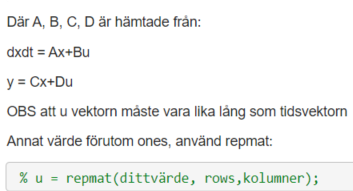

##### Skapa transfer function

In [ ]:
numerator = 1;
denominator = [2, 3, 4]; %ange koefficienter för polynomer
func = tf(numerator, denominator)

In [ ]:
s = tf('s');
G = 1/(s^2+4*s+3)

##### State-space to transfer function

In [ ]:
A = [-2 -1;1 -2];
B = [1 1;2 -1];
C = [1 0];
D = [0 1];
model = ss(A,B,C,D);

func = tf(model)

##### transfer function to state-space

In [ ]:
numerator = 0.16;
denominator = [1/1000 3/100 3/10 1];
tf(numerator,denominator)
[A,B,C,D] = tf2ss(numerator,denominator)

##### Transfer function till diskret funktion

In [ ]:
s = tf('s');
G = 2/(s+3);
c2d(G,0.1)

##### Create models

###### Model reduction

###### Transfer function reduction (zpk & feedback)

In [ ]:
% Original Transfer Function: H(s) = 10 / (s^2 + 3s + 10)
% Step 1: Define the original transfer function
numerator = 10;
denominator = [1, 3, 10];
H_original = tf(numerator, denominator);

% Step 2: Convert to ZPK form
[Z, P, K] = tf2zpk(numerator, denominator);
disp('Original ZPK Representation:');
disp(['Zeros: ', num2str(Z)]);
disp(['Poles: ', num2str(P)]);
disp(['Gain: ', num2str(K)]);

% Step 3: Reduce the model by keeping only the dominant pole
% We'll keep the first pole (the one with the smallest real part)
reduced_P = P(1);  % First pole (dominant one)
reduced_K = K;     % Use the same gain

% Step 4: Create the reduced model with one pole
H_reduced = zpk([], reduced_P, reduced_K);

###### Feedback model (reduction)

In [ ]:
s = tf('s');
G = 1/(s+1);
C = 1+(2/s);
feedback(G*C,1)

###### Balanced state-space realization (reduction)

A balanced realization is a transformation of the state-space representation such that the controllability and observability Gramians are equal and diagonal. Helps identify states that contribute very little to system dynamics.

In [ ]:
A = [-1 0 0 ; 0 -0.1 0 ; 0 0 -0.101];
B = [1;1;-1];
C = [1 1 1 ];
D = 0;
G = ss(A,B,C,D);
[sysg,g] = balreal(G);

g är Hankel singular values, vilket visar hur viktig varje feature är.

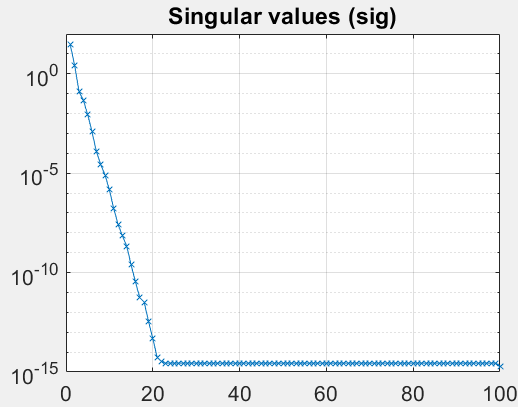

I detta exemplet har features i index 0-20 ett viss värde, features närmare 0 är viktigast. I modred sätter du sen en tolerans på vilka features man ska ta med, enligt detta.

###### Modred

The actual state-space reduction

In [ ]:
G1 = modred(sysg,g < g(1))
G2 = modred(sysg,g < g(2))
bode(G,G1,G2)

##### Subspace method för state-space modeling

In [ ]:
rng('default')
sys = idss(drss(4,2,2)); sys.D=zeros(2,2); % skapar en random 4th order state-space model med två input två output, D=0
u = idinput([300,2],'rbs',[0 0.2]); % 300 låg frekvens binär input
y0 = sims(sys,u);
e = randn(300,2); % skapar noise vektor
y = y0+e; % lägger till noise i outputten
z = iddata(y,u) % skapar data objekt

% Estimera en 4th order state space modell
ms = n4sid(z,4)
compare(iddata(y0,u),ms)

##### Black-box modellering

In [ ]:
model_oe = oe(data,[2 2 1])
model_arx = arx(data,[2 2 1])
model_armax = armax(data,[2 2 2 1])
model_bj = bj(data,[2 2 2 2 1])

##### Box-Jenkins modelling

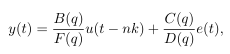

In [ ]:
nb = 1; nc = 1; nd = 2; nf = 2; nk = 1;
M = bj(z, [nb nc nd nf nk])

##### ETFE

In [ ]:
fs = 100;
T = 1/fs;
N = 1e4;      
t = T*(0:N-1)';
df = 1/N/T;
fvec = (0:N/2)*df;

% ETFE
Y = T*fft(y);
U = T*fft(u);
Ghat = Y ./ U;

%% Simulate and compare to true system

% true system
z = tf('z',T);
G = 0.15*(1+z^(-1))/(1-1.6*z^(-1) + 0.9*z^(-2));
e = randn(N,1);

Gw = squeeze(freqresp(G,2*pi*fvec));
figure(2)
loglog(fvec,abs(Ghat(1:N/2+1)),'b','linewidth',2);
hold on
loglog(fvec,abs(Gw),'r--','linewidth',1.5)
axis([f0 f1 1e-3 10])
xlabel('Frequency [Hz]')
ylabel('abs(G)')
legend('abs(Ghat)','True abs(G)','Location','best')
set(gca,'fontsize',16)
title('ETFE','fontsize',18)

##### Beräkna transfer function från spectrum

In [ ]:
Ghat = spa(iddata(y,u,T),gamma,w) % gamma = smoothing factor, w = frekvens intervall att nyttja

##### Automatisk black-box modellering

In [ ]:
%% Generera input-output data

% Generate synthetic input-output data for ARX modeling
N = 100; % Number of samples
t = (1:N)'; % Time vector

% Input signal (u): Random signal
u = randn(N, 1);

% ARX system parameters
na = 1; % Order of A(z)
nb = 2; % Order of B(z)
nk = 5; % Input delay

% True system coefficients
A = [1, 0.702]; % A(z) = 1 + 0.702*z^(-1)
B = [0, 0, 0, 0, 0.9939, 1.991]; % B(z) = 0.9939*z^(-5) + 1.991*z^(-6)

% Simulate the output (y)
e = 0.05 * randn(N, 1); % Additive noise
y = filter(B, A, u) + e; % Output signal

% Combine input-output data into an iddata object
z = iddata(y, u, 1); % Sampling time = 1 (discrete data)

%% Approximera bästa black-box modell och dess ordning

% Skapa na, nb, nk att testa
NN = struc(1:4,1:4,1:10);

% Beräknar loss function för data och alla ordningar
V = arxstruc(z,z,NN);

% Väljer bästa modellen som passar
Nbest = selstruc(V,'mdl');

% Approximerar parametrarna utifrån Nbest
arxbest = arx(z,Nbest);

##### System Identification GUI

In [ ]:
ident

##### Grey-box modelling

In [ ]:
A = [0 1;0 -1];
B = [0;0.25];
C = eye(2);
D = [0;0];
K = zeros(2,2);
x0 = [0;0];
m = idss(A,B,C,D,K,'Ts',0); % 0: Ts = 0, kontinuerlig modell

% ange konstanter som inte ska varieras
S = m.Structure;
S.A.Free(1,:) = false;
S.A.Free(2,1) = false;
S.B.Free(1) = false;
S.C.Free = false;
S.D.Free = false;
S.K.Free = false;
m.Structure = S;
m.NoiseVariance = [0.01 0; 0 0.1];

opt = ssestOptions;
opt.InitialState = idpar(x0);
opt.InitialState.Free(2) = false;
%% Estimate model structure
z = iddata(y,u,0.1);
m = ssest(z,m,opt)

##### SVD/PCA

V vektorn ger principal vektorerna. Vektorerna är organiserade som kolumner i storleks ordning. Dessa vektorer ger de mest signifikanta riktningar som påverkar datan. Multiplicera datan med två första kolumnerna för 2D projection, tre kolumner för 3D projektion.

Om man vet till exempel att denna stora data matrix man räknar på har två klassifikationer, så kommer första principal komponent innebära ena klassifikationen, andra vektorn den andra.

In [ ]:
[U,S,V]= svd(A,'econ');   

### Performance & model analysis

#### Jämföra modeller mot data

In [ ]:
figure
horizon = inf;
compare(data,model_oe,model_arx,model_armax,model_bj,horizon)

#### Truncation error bound

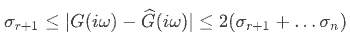

The hsvd function in MATLAB computes the Hankel singular values of a system, which are metrics indicating the energy contribution of each state in a state-space system. It is often used in model reduction and system analysis to identify states with negligible impact on the system's input-output behavior.

In [ ]:
s = hsvd(G)
err1 = 2*(s(2)+s(3)+s(4))
err2 = 2*(s(3)+s(4))

#### Hämta covariance av parameters

Om din modell är sparad som idss:

In [ ]:
covMatrix = getcov(sys);
param_std = sqrt(diag(covMatrix));
disp('Covariance matrix of parameters:');
disp(covMatrix);
disp('Standard deviations of parameters:');
disp(param_std);

Kolla om det finns singular values, indikerar på att datan inte var tillräcklig för vissa parametrar. Tvinga denna parametern till ett viss värde, kanske modellen blir bättre

#### Poles and zeros från modell

In [ ]:
pzmap(sys)
C = [1 -0.4 0.6];
zplane(C)
// get angles
rootsC = angle(roots(C))/pi/2;

#### Beräkna correlation av två data

In [ ]:
corrcoef([data1 data2])

#### Residual analysis

In [ ]:
resid(iddata(y,u),sys)

#### Welch Spectrum

Utvärdera genom att kolla vilken frekvens signalerna börjar dala, från denna frekvens uppåt blir modellen opålitlig. Den frekvensen som det börjar bli opålitligt är den punkt där den börjar dala gånger nyqvist frekvensen = Fs/2, Fs=1/T där T är samplings perioden, Fs samplings frekvensen.

In [ ]:
figure
pwelch(u)
hold on
pwelch(y)

#### Plot spectrum extracted from ident

In [ ]:
data = sp2000.SpectrumData;
vector = data(1, 1, :);  % Extract the data along the third dimension
f = sp2000.Frequency;
vector = reshape(vector, [], 1);  % Reshape into a column vector
plot(f,vector)

## Signalbehandling

### Step response

In [ ]:
stepplot(func)

### Beräkna kovarians från impulse response

In [ ]:
N = 100;
h = impulse(G,N); % G är transfer function enligt box-jenkins
[Rw,lags]=xcov(h,20,'none')
plot(lags,Rw,'b-x','linewidth',2);

### Jämföra med bode diagram

In [ ]:
figure(6)

G = 1/(s^2+2*s+4);
h = 0.1;
Gd = c2d(G,h) %c2d diskretiserar kontinuerliga system med zero-hold input

%P = bodeoptions;
%P.FreqUnits = 'Hz'
bode(Gd,'b-')
%print -depsc ident01_bode.eps

hold on
[A,B,C,D,F,dA,dB,dC,dD,dF] = polydata(model_oe);
bode(tf(B,F,0.1),'g--')
[A,B,C,D,F,dA,dB,dC,dD,dF] = polydata(model_arx);
bode(tf(B,A,0.1),'r--')
[A,B,C,D,F,dA,dB,dC,dD,dF] = polydata(model_armax);
bode(tf(B,A,0.1),'k--')
[A,B,C,D,F,dA,dB,dC,dD,dF] = polydata(model_bj);
bode(tf(B,F,0.1),'y--')
legend('true system','OE','ARX','ARMAX','BJ','Linewidth',2,'Location','West')

## Time series analysis

### Model making

#### General workflow

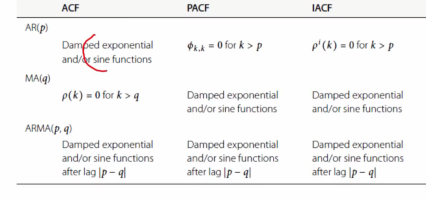

* Plot ACnPACF
* Analyze the plots if AR or MA should be introduced
* Introduce appropriate orders into the parameter estimation
* Inverse filter the model to generate residuals (flip the parameter placements in the filter function) Ideally, if the process is being fed with white noise, inversing the output with your model (if its correct) will result in a white function.
* Repeat until you achieve white ACnPACF

In [ ]:
// example of one part in the iteration:

noLags = 30;
plotACFnPACFnNorm(data.OutputData, noLags, "ARMA 1");   % from plot, decaying ACF, implying AR, and two correlations in PACF

%%
clc,close all

ar_model = arx(y1, [2]);
present(ar_model)
e_hat = filter(ar_model.A, ar_model.C ,y1);
e_hat=e_hat(length(ar_model.a):end);    % remove initial samples
plotACFnPACF(e_hat, noLags, "");

#### Parameter estimation

##### PEM
An approximator for parameters

In [ ]:
dataContainer = iddata( y );            % Create an iddata struct for the data. Try using z instead; does this give a better model?
Am = [ 1 1 ];                           % Specify assumed model orders.
Cm = [ 1 ];

% You can also use the non-differentiated data. How does the resulting
% polynomials compare? Remember to change line 80 as well!
%dataContainer = iddata( data );
%Am = conv([ 1 1 ], [1 -1] );

% Estimate unknown parameters using PEM (more on this later).
foundModel = pem( dataContainer, idpoly( Am,[],Cm ) );                   
present( foundModel );                  % The confidence interval is +/- one std, i.e., 68% confidence interval.

% Compute the residual. Remember to remove the initial samples.
ey = filter( foundModel.A, 1, y );  ey = ey(length(foundModel.A):end );

% Plot the ACF and PACF.
figure
plot( ey )
title('Model residual. Is it white?')
plotACFnPACF( ey, noLags, 'Residual' );

% With the differentiation, the found A-polynomial is:
conv(foundModel.A, [1 -1])

% The variance of the residual is a measure for how well the model fits the
% data. How much of the data did we manage to explain?
fprintf('\nThe variance of original data is       %5.2f.\n', var(data)')
fprintf('The variance explained by the model is %5.2f.\n', var(data)-var(ey)')
fprintf('The model explains %5.2f %% of the data.\n', 100*(var(data)-var(ey) )/var(data)')

##### ARX (AR estimation)

In [ ]:
// A(z) y(t) = [C1(z)/A1(z)] e(t)
ar_model = arx(y, [na]) //na is model order

##### ARMAX (ARMA estimation)

In [ ]:
// A(z) y(t) = [C1(z)/A1(z)] e(t)
arma_model = armax(y, [na nc])  //na nc are model orders

#### Add fixed and free coefficients
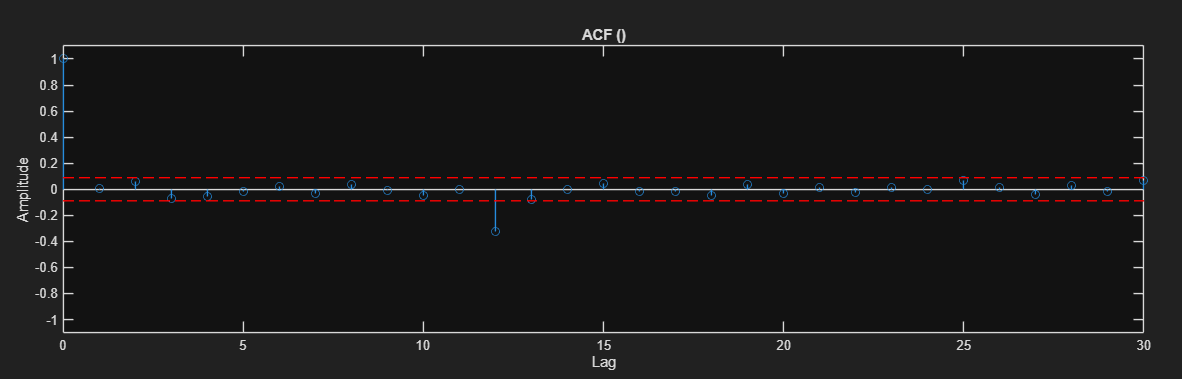

In this example, there is a missing MA coefficient at lag 12, so we want to add only a c12 coefficient to the model.

In [ ]:
Am = [1 1 1];
Cm = [1 zeros(1,12)];

model_init = idpoly(Am,[],Cm);
model_init.Structure.c.Free = [zeros(1,12) 1];  % Locks coefficients from c1 to c11 to be fixed at zero
model_armax_ma = pem(data, model_init)

#### Add trend operator
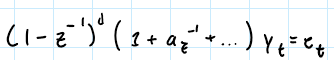

Example what happens with the vectors:

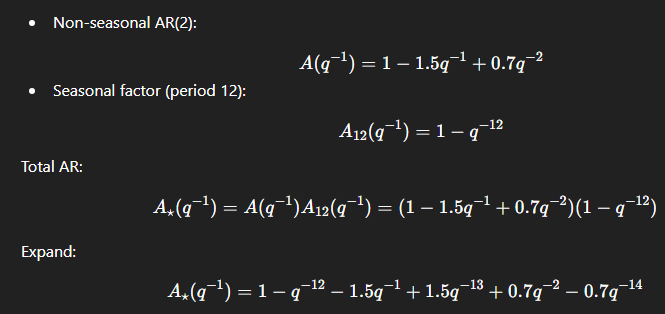

In [ ]:
Am = [1 1 1];
Cm = [1 zeros(1,12)];

s = 12;
s_poly = [1 zeros(1, s-1) -1];
Am_s = conv(Am,s_poly);                                                 % The convolving

model_init = idpoly(Am_s,[],Cm);

model_init.Structure.c.Free = [zeros(1,12) 1];                          % Locks coefficients from c1 to c11 to be fixed at zero
model_init.Structure.a.Free = [1 1 1 zeros(1,s-length(Am)) -1 -1 -1];   % Locks coefficients a0, a1, a2, a12, a13 and a14 to be free

model_armax_ma = pem(data_y, model_init)

#### Box-cox

In [ ]:
figure; 
lambda_max = bcNormPlot(powerload,1);

#### AR & MA
According to:

A(z) y(t) = [C1(z)/A1(z)] e(t)

where e is white noise

In [ ]:
C  = [ 1 0.6 0.5 -0.8 ];
A  = [ 1 -0.6 0.8 ];

#### Box-jenkins
Ay=(B/A2)u+(C1/A1)e

A=1

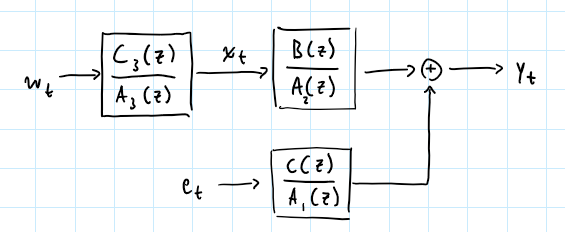

In [ ]:
// start by estimating the wt process using ACnPACF
foundModel = estimateARMA( x, [ 1 1 ], [ 1 0 0 1  ], 'Input model 4', noLags );
// then form cross-correlations using the found models
ex = filter( foundModel.A, foundModel.C, x );   ex = ex(length(foundModel.A):end );
ey = filter( foundModel.A, foundModel.C, y );   ey = ey(length(foundModel.A):end );

figure;
[Cxy,lags] = xcorr( ey, ex, noLags, 'coeff' );
stem( lags, Cxy )
hold on
condInt = 2*ones(1,length(lags))./sqrt( length(ey) );
plot( lags, condInt,'r--' )
plot( lags, -condInt,'r--' )
hold off
xlabel('Lag')
ylabel('Amplitude')
title('Crosscorrelation between filtered in- and output')

// and use these plots to estimate d, s and r according to:

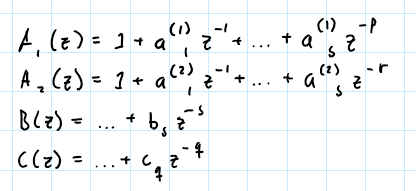
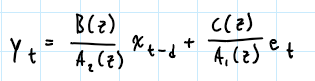

Example way of thinking:
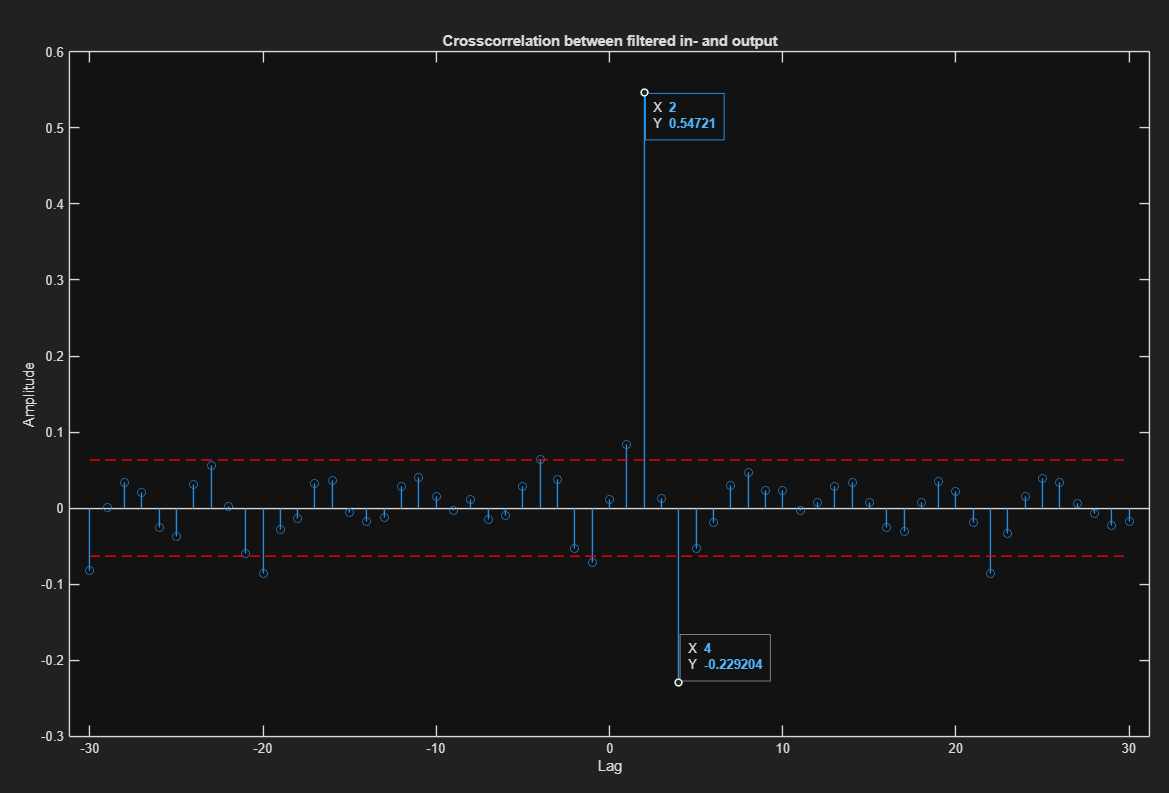
The correlation starts strong at lag=2, so the delay should be 2. The correlation stops at lag=4, so lag 2, 3, 4 -> three lags, showing a filter length of 3. However, one of the inbetween correlations are zero, so subtract one from 3 -> s=2.

So the parameters to be included is b0 (first strong peak) not b1 because almost zero, and b2, and all delayed by 2 samples

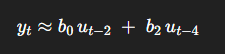

Written in matlab as [0 0 1 0 1], so 3rd index 1 is b0, 4th index 0 is b1 and 5th index 1 is b2. The two zeros at the start signifies the delay of two.

We have now estimated the orders for the input. Now we can move on to estimating the orders for the noise process.

In [ ]:
// using these orders, estimate initial BJ model, which now estimates
// C1, A1, B and B2
estimateBJ( y, x, [1], [1], [0 0 1 0 1], [1], 'BJ model 1', noLags );
foundModel = estimateBJ( y, x, [1 0 0 1 1], [1 1 1 1], [0 0 1 0 1], [1], 'BJ model 4', noLags );

// final check, the residual should be uncorrelated with the input xt
ut        = filter( foundModel.B, foundModel.F, x );
tilde_et = y - ut;      

% Note that we now have to remove samples from x as well.
tilde_et = tilde_et( length(foundModel.B):end );
tilde_xt = x(length(foundModel.B):end );
tilde_ut = ut(length(foundModel.B):end );

figure
[Cxy,lags] = xcorr( tilde_xt, tilde_et, noLags, 'coeff' );
stem( lags, Cxy )
hold on
condInt = 2*ones(1,length(lags))./sqrt( length(y) );
plot( lags, condInt,'r--' )
plot( lags, -condInt,'r--' )
hold off
xlabel('Lag')
ylabel('Amplitude')
title('Crosscorrelation between input and residual without the influence of the input')

#### Filtering

In [ ]:
e  = randn( N+extraN, 1 );
y1 = filter( C, 1, e );     y1 = y1(extraN:end);
y2 = filter( C, A, e );     y3 = y3(extraN:end);
// remove inital samples before filter becomes excited

### Visualization

#### Generate true spectrum from parameters

In [ ]:
Padd = 1024;
C  = [ 1 0.6 0 0 0.4 ];
A  = [ 1 -0.4 0.6 ];  
w  = exp( 1i* linspace(-.5,.5,Padd)*2*pi )';
X1 = abs( polyval(C,w) ).^2;
X2 = 1 ./ abs( polyval(A,w) ).^2;

#### ACnPACF
Function from the course:

In [ ]:
noLags = 30;    % Number of lags shown for ACF and PACF.
plotACFnPACF( y, noLags, 'AR');

#### Cross-correlation
(Also with confidence interval)

In [ ]:
figure
[Cxy,lags] = xcorr( y, x, noLags, 'coeff' );
stem( lags, Cxy )
hold on
condInt = 2*ones(1,length(lags))./sqrt( length(y) );
plot( lags, condInt,'r--' )
plot( lags, -condInt,'r--' )
hold off

#### Plot correlation confidence interval

In [ ]:
condInt = 2*ones(1,length(lags))./sqrt( length(y) );
plot( lags, condInt,'r--' )
plot( lags, -condInt,'r--' )

### Performance

#### Whiteness test
Uses montiTest, ey is the residual computed by filtering the found model with output.

In [ ]:
[deemedWhite, Q, chiV] = montiTest( ey );
if deemedWhite
     fprintf('The residual is deemed to be WHITE according to the Monti-test (as %5.2f < %5.2f).\n', Q, chiV );
else
    fprintf('The residual is NOT deemed to be white according to the Monti-test (as %5.2f > %5.2f).\n', Q, chiV );
end

% Does the residual have a mean that is different from zero?
[ rejectH0, tRatio, tLimit ] = testMean( ey );
if rejectH0
    fprintf('The data is not deemed to be zero-mean (as %6.4f > %6.4f). \n', tRatio, tLimit )
else
    fprintf('The data is deemed to be zero-mean (as %6.4f < %6.4f). \n', tRatio, tLimit )
end

In [ ]:
// MATLAB built in
whitenessTest(e_hat)

#### Form residuals

In [ ]:
e_hat = filter(ar_model.A, ar_model.C ,y);
e_hat=e_hat(length(ar_model.a):end);    % remove initial samples
plotACFnPACF(e_hat, noLags, "");

#### xcorr input and output
If the cross correlation between input and output is white then there is no more information that can be extracted.

In [ ]:
// y1 is input, y2 is output

%   A(z) = 1,       B(z) = B(z),    F(z) = A2(z)
%   C(z) = C1(z),   D(z) = A1(z)

tilde_et = y2 - filter( foundModel.B, foundModel.F, y1 );      

% Note that we now have to remove samples from x as well.
tilde_et  = tilde_et(length(foundModel.B):end );
filter_xt = y1(length(foundModel.B):end );

figure
[Cxy,lags] = xcorr( filter_xt, tilde_et, noLags, 'coeff' );
stem( lags, Cxy )
hold on
condInt = 2*ones(1,length(lags))./sqrt( length(y1) );
plot( lags, condInt,'r--' )
plot( lags, -condInt,'r--' )
hold off
xlabel('Lag')
ylabel('Amplitude')
title('Crosscorrelation between input and residual without the influence of the input')

#### ACFnPACF Gaussian test

In [ ]:
// from provided lecture code

[acf, pacf] = plotACFnPACF(e_hat_ma, noLags, "");

checkIfNormal( acfEst(2:end), 'ACF' );
checkIfNormal( pacfEst(2:end), 'PACF' );

### Signal processing

#### Generate white noise

In [ ]:
extraN = 100;
N  = 100;
e  = randn( N+extraN, 1 );

// or 
rng(0);
sigma2 = 1;
e = sqrt(sigma2) * randn(N,1);

#### Generate AR/MA/ARMA process

In [ ]:
// A(z) y(t) = [C1(z)/A1(z)] e(t)

C1 = [ 1 0.4 0 0.6 ];   // MA part
A1 = [ 1 -0.4 0.8 ];    // AR part

// Generate noise
N      = 1000;                                  % Try reducing the number of available samples to N=100. What happens? How many samples do you need to get a white residual even with the true model?
extraN = 100;                                   % Add some intial samples to avoid initiation effects.
e = randn(N+extraN, 1);

z = filter( C1, 1, e );     // MA process
x = filter( 1, A1, e );     // AR process
c = filter( C1, A1, e );    // ARMA process

#### Generate BJ process

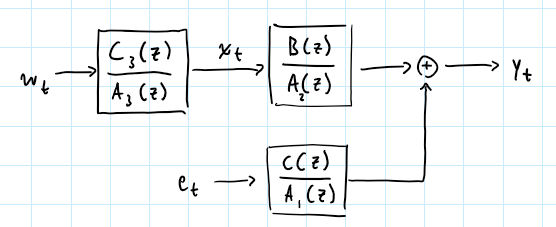

In [ ]:
% A(z) y(t) = [B(z)/A2(z)] u(t) + [C1(z)/A1(z)] e(t)

C1 = [ 1 0.4 0 0.6 ];
A1 = [ 1 -0.4 0.8 ];
C3 = [ 1 0 0 0.8 ]; 
A3 = [ 1 .9 ];
B  = [ 0 0 2 0 -0.8 ];
A2 = 1;
noLags = 30;    

% Generate the noise and the input signals.
N      = 1000;                                  % Try reducing the number of available samples to N=100. What happens? How many samples do you need to get a white residual even with the true model?
extraN = 100;                                   % Add some intial samples to avoid initiation effects.
z = filter( C1, A1, randn(N+extraN, 1) );       % This is the noise model.
x = filter( C3, A3, randn(N+extraN, 1) );       % This is the input signal.

% Form the output using the filtered input. Remove the initial samples.
u = filter( B, A2, x );                         % This is the influence of the input on the output.
y = u + z;                                      % Form the observed signal.

% Remove the extra samples added to avoid initiation effects.
y = y(extraN:end);                              
x = x(extraN:end);
u = u(extraN:end);

#### Add season to data

In [ ]:
A  = [ 1 -0.6 0.8 ];
s = 24;
A = conv( A, [ 1 zeros(1,s-1) -1 ] );
y1 = filter( C, 1, e );     y1 = y1(extraN:end);

#### Remove season from data

In [ ]:
// Deterministic approach
N = length(data);
X = [ ones(N,1) (1:N)' ];
theV = inv( X'*X )*X'*data;             % This is the least-squares estimate of the trend. More on this later.
z = data - theV(1) - theV(2)*(1:N)';

// Stochastic approach
y = filter([1 -1], 1, data);
y = y(2:end); 

// Several trends
sweek = 168; 
sday  = 24;
dayPoly  = [1 zeros(1,sday-1) -1];
weekPoly = [1 zeros(1,sweek-1) -1];
powerload = filter(dayPoly,1,powerload);      powerload = powerload(sday+1:end);
powerload = filter(weekPoly,1,powerload);     powerload = powerload(sweek+1:end);

#### Transform data
Is required when the data stems from data with constant mean, but increasing variance.

In [ ]:
figure; 
lambda_max = bcNormPlot(y,1);   % See also table 4.6
fprintf('The Box-Cox curve is maximized at %4.2f. This suggests that a sqrt or log-transform might be helpful.\n', lambda_max)

// perform log transformation
original  = powerload;
powerload = log( powerload ); 

### Custom Scripts examples

#### plotACnPACF & plotACnPACFnNorm
(same inputs for both)

In [ ]:
C3 = [ 1 0 0 0.8 ]; 
A3 = [ 1 .9 ];

N      = 1000;
extraN = 100;      
x = filter( C3, A3, randn(N+extraN, 1) );

noLags = 30;    % Number of lags shown for ACF and PACF
plotACFnPACF( x, noLags, 'Input' );

#### estimateARMA

In [ ]:
// this example, [1 1 0 1] is AR part, three orders, excluding coefficient z^-2
estimateARMA( x, [ 1 1 0 1 ], [ 1 ], 'Input model 1', noLags );

### Small notes

#### Polynomial variable storage
Use idpoly to store relevant polynomials in relevant models

In [ ]:
A1 = [1 -1.79 0.84];
C1 = [1 -0.18 -0.11];

A2 = [1 -1.79];
C2 = [1 -0.18 -0.11];

ARMA_poly1 = idpoly( A1, [], C1);
ARMA_poly2 = idpoly( A2, [], C2);

ARMA_poly1.a, ARMA_poly1.c